# **Tarefa 1 - Importar as bibliotecas**

In [ ]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.3.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


# **Tarefa 2 - Pré-processamento de dados**

In [ ]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test   = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# **Tarefa 3 - Visualizando os exemplos**

In [ ]:
class_names = ['aeroplane', 'car', 'bird']

In [ ]:
def Show_random_examples(x, y, p):
  indices = np.random.choice(range(x.shape[0]), 
                             10,
                             replace = False)
  
  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize = (10, 5))
  for i in range(10):
    plt.subplot(2, 5, 1 + i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color = col)
  plt.show()

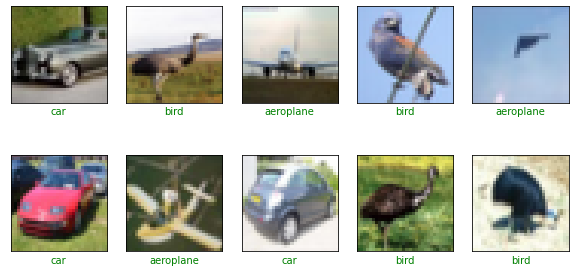

In [ ]:
Show_random_examples(x_train, y_train, y_train)

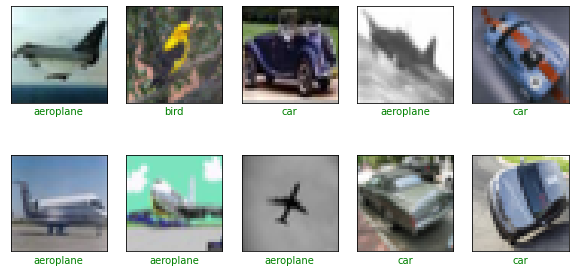

In [ ]:
Show_random_examples(x_test, y_test, y_test)

# **Tarefa 4 - Criando o modelo**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [ ]:
def Create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters,
                         3, 
                         activation = 'relu',
                         padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,
                         3,
                         activation = 'relu'))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32, 32, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam', 
                  metrics=['accuracy'])
    return model

In [ ]:
model = Create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

# **Tarefa 5 - Treinando o modelo**

In [ ]:
h = model.fit(x_train/255.,
              y_train,
              validation_data = (x_test/255., y_test),
              epochs = 10, 
              batch_size = 128,
              callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2),
                         tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/models/model_{val_accuracy:.3f}.h5',
                                                            save_best_only = True,
                                                            save_weights_only = False,
                                                            monitor = 'val_accuracy')
                         ]
              )

Epoch 1/10
118/118 [==============================] - 77s 652ms/step - loss: 0.8993 - accuracy: 0.6823 - val_loss: 2.3464 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 77s 653ms/step - loss: 0.5639 - accuracy: 0.7753 - val_loss: 2.1007 - val_accuracy: 0.4340
Epoch 3/10
118/118 [==============================] - 77s 653ms/step - loss: 0.4917 - accuracy: 0.8029 - val_loss: 1.9602 - val_accuracy: 0.5290
Epoch 4/10
118/118 [==============================] - 77s 656ms/step - loss: 0.4502 - accuracy: 0.8215 - val_loss: 1.7439 - val_accuracy: 0.4850
Epoch 5/10
118/118 [==============================] - 77s 654ms/step - loss: 0.4084 - accuracy: 0.8395 - val_loss: 0.8444 - val_accuracy: 0.6953
Epoch 6/10
118/118 [==============================] - 77s 655ms/step - loss: 0.3793 - accuracy: 0.8530 - val_loss: 0.4188 - val_accuracy: 0.8393
Epoch 7/10
118/118 [==============================] - 77s 655ms/step - loss: 0.3514 - accuracy: 0.8645 - val_loss: 0.3414 - val_ac

# **Tarefa 6 - Predições finais**

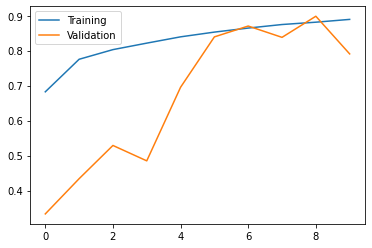

In [ ]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label = 'Training')
plt.plot(range(len(accs)), val_accs, label = 'Validation')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/models/model_0.746.h5')

In [ ]:
preds = model.predict(x_test/255.)

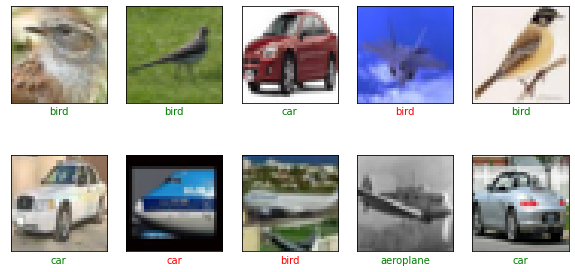

In [ ]:

Show_random_examples(x_test, y_test, preds)